In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
^C


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



### 讀取與顯示數位影像

In [3]:
img_ori=cv2.imread(r"input\lena.bmp",0)#讀取影像檔案，第二個參數為影像的讀取方式
cv2.imshow("ex_test",img_ori)#建立視窗
cv2.waitKey(0)#第6行WaitKey等待使用者的鍵盤輸入，單位為毫秒(ms)，例如1,000 代表等待1秒再關閉視窗，0則表示持續等待使用者輸入任意鑑後再關閉視窗。
cv2.destroyAllWindows()#關閉所有視窗

## 1. Histogram Equalization
Histogram is the method to enhance image contrast.
Please show the image grayscale histogram and do the equlization, and show the image result and histogram equalization result.

True

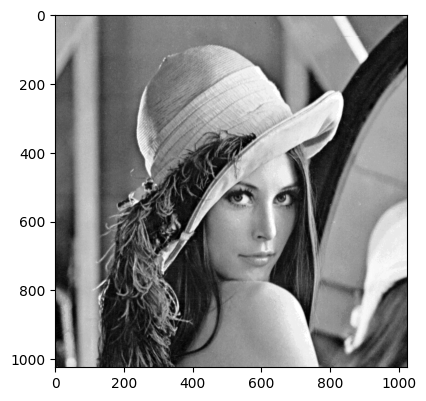

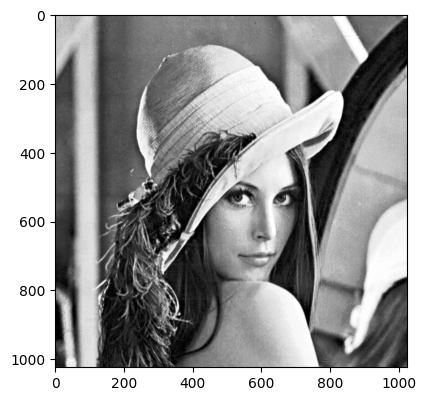

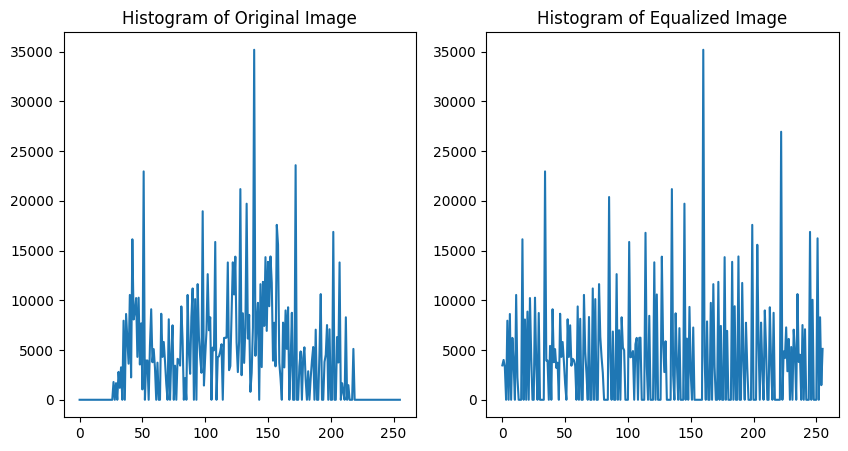

In [2]:
img_ori = cv2.imread("input\lena.bmp", cv2.IMREAD_GRAYSCALE) # Read image as gray.


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_ori,cmap='gray')

img_equa=cv2.equalizeHist(img_ori)
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.imshow(img_equa,cmap='gray')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
hist_ori = cv2.calcHist([img_ori], [0], None, [256], [0, 256])
plt.plot(hist_ori)
plt.title('Histogram of Original Image')

plt.subplot(1, 2, 2)
hist_equa = cv2.calcHist([img_equa], [0], None, [256], [0, 256])
plt.plot(hist_equa)
plt.title('Histogram of Equalized Image')
"""
Your code here
"""

# save result
cv2.imwrite('output/img_ori.bmp', img_ori)
cv2.imwrite('output/img_equa.bmp', img_equa)

## 2.Mean blur, Gaussian blur, Median blur
Blur is a method to deal with the noise on the image. Please input the image and use different kernel size to show blur result.

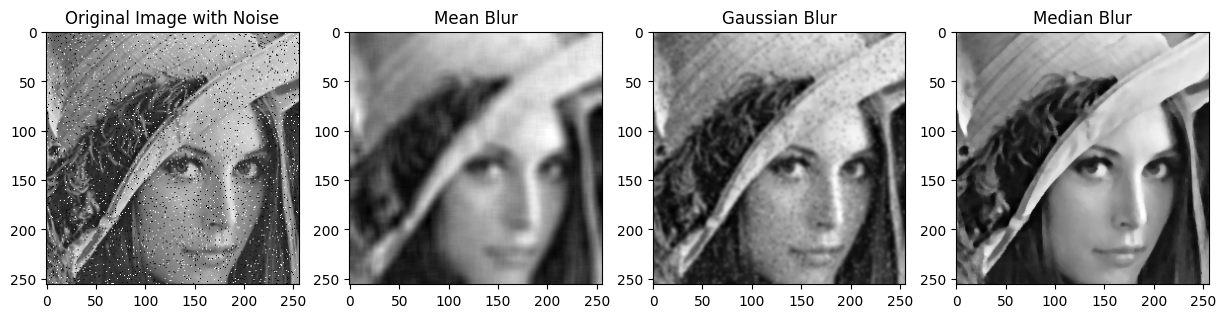

True

In [3]:
img_noise = cv2.imread("input\lena_noise.png", cv2.IMREAD_GRAYSCALE)

# Blur the image by three methods.
image_meanBlur = cv2.blur(img_noise, (11,11))
image_GaussianBlur = cv2.GaussianBlur(img_noise, (11,11),1.5)
image_medianBlur = cv2.medianBlur(img_noise, 5)

plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_noise, cmap='gray')
plt.title('Original Image with Noise')

plt.subplot(1, 4, 2)
plt.imshow( image_meanBlur , cmap='gray')
plt.title('Mean Blur')

plt.subplot(1, 4, 3)
plt.imshow(image_GaussianBlur, cmap='gray')
plt.title('Gaussian Blur')

plt.subplot(1, 4, 4)
plt.imshow(image_medianBlur, cmap='gray')
plt.title('Median Blur')

plt.show()

"""
Your code here
"""

#save result
cv2.imwrite('output/img_mean_blur.png', image_meanBlur)
cv2.imwrite('output/img_gaussian_blur.png', image_GaussianBlur)
cv2.imwrite('output/img_median_blur.png', image_medianBlur)

## 3. Binary
Binary is a method to transfer greyscale to 0 (black) and 255 (white) only.  
Please do the image binary to seperate pad and background.  


True

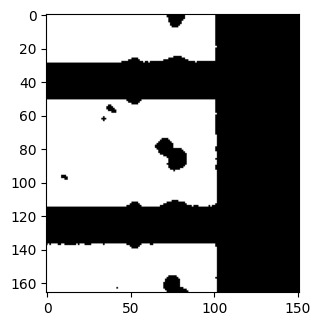

In [6]:
binary1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)
threshold = 155
# Do the image binary to seperate pad and background
_,image_binary = cv2.threshold(binary1, threshold, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(image_binary , cmap='gray')
thres1 = image_binary 
"""
Your code here
"""

# save result
cv2.imwrite('output/binary_task1.bmp', thres1)

True

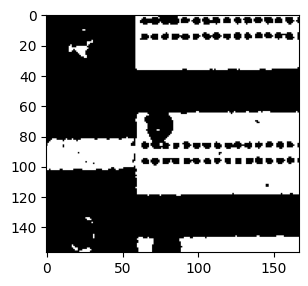

In [5]:
binary2 = cv2.imread('input/binary_task2.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background
_,image_binary = cv2.threshold(binary2, threshold, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(image_binary , cmap='gray')
thres2 = image_binary 
"""
Your code here
"""

# save result
cv2.imwrite('output/binary_task2.bmp', thres2)

True

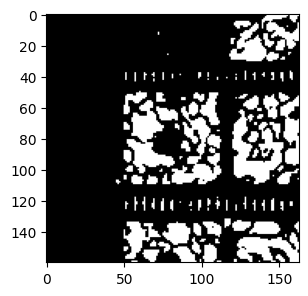

In [7]:
binary3 = cv2.imread('input/binary_task3.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background
_,image_binary = cv2.threshold(binary3, threshold, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(image_binary , cmap='gray')
thres3 = image_binary
"""
Your code here
"""

# save result
cv2.imwrite('output/binary_task3.bmp', thres3)

## 4. HSV filter
This method could extract the the interested part by color.  
Please crop the yellow or blue boxes and its surrounding in the image.

True

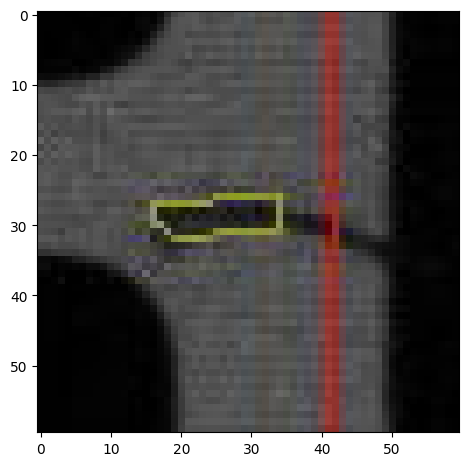

In [23]:
#找出黃色的範圍
# Yellow box.

yellow = cv2.imread('input/yellow.jpg')
lowerb = np.array([26,43,46])
upperb = np.array([34,255,255])
# Step 1. Transfer color to HSV
image_hsv = cv2.cvtColor(yellow, cv2.COLOR_BGR2HSV)
#plt.imshow(image_hsv)
# Step 2. Setting the color range and filter the image.
mask = cv2.inRange(image_hsv, lowerb, upperb)


# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
_,image_binary = cv2.threshold(image_hsv, threshold, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(25, 25))
plt.subplot(1, 4, 1)
#plt.imshow(image_binary , cmap='gray')
x=3175
y=2525
w=20
h=20

# Step 4. Crop the image by the coordinate.
result_img = cv2.bitwise_and(yellow, yellow, mask=mask)
image_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
#plt.imshow(image_rgb)

crop_edge = 20  # surrounding 20 pixels 
cropHSV_yellow = yellow[y-crop_edge: y+h+crop_edge, x-crop_edge: x+w+crop_edge]   # take (x, y, w, h) as example.
cropHSV_yellow_RGB = cv2.cvtColor(cropHSV_yellow, cv2.COLOR_BGR2RGB)
plt.imshow(cropHSV_yellow_RGB)


# save result
cv2.imwrite('output/cropHSV_yellow.jpg', cropHSV_yellow)

True

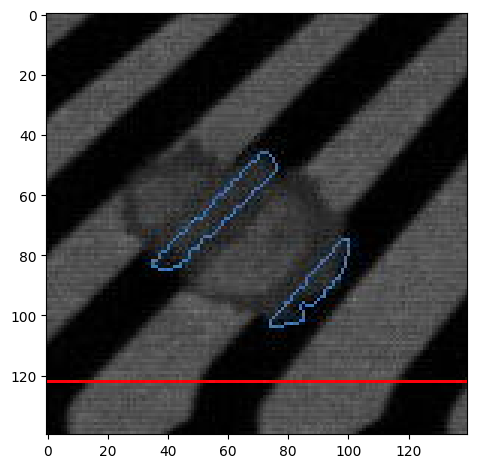

In [11]:
# Blue box.
blue = cv2.imread('input/blue.jpg')
lowerb = np.array([100,43,46])
upperb = np.array([124,255,255])

# Step 1. Transfer color to HSV
image_hsv = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
# Step 2. Setting the color range and filter the image.
mask = cv2.inRange(image_hsv, lowerb, upperb)
# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
_,image_binary = cv2.threshold(image_hsv, threshold, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(25, 25))
plt.subplot(1, 4, 1)
plt.imshow(image_binary , cmap='gray')
x=1300
y=2500
w=100
h=100
# Step 4. Crop the image by the coordinate.
crop_edge = 20  # surrounding 20 pixels 
cropHSV_blue = blue[y-crop_edge: y+h+crop_edge, x-crop_edge: x+w+crop_edge]   # take (x, y, w, h) as example.
plt.imshow(cropHSV_blue)
cropHSV_blue_RGB = cv2.cvtColor(cropHSV_blue, cv2.COLOR_BGR2RGB)
plt.imshow(cropHSV_blue_RGB)

# save result
cv2.imwrite('output/cropHSV_blue.jpg', cropHSV_blue)

## 5. Morphological: erosion, dilation, open, close

Those methods help to denoise, enhance the features.   
Please use these methods to fill up the lines of the image created in the previous section.

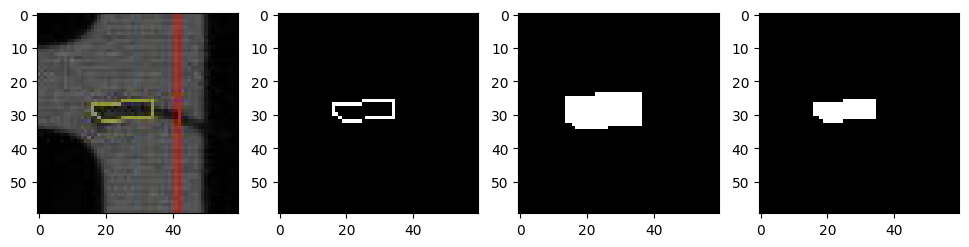

True

In [34]:
hsv_yellow = cv2.imread('output/cropHSV_yellow.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)
threshold = 121
# Try to use erosion, dilation, open, close to fill up the lines.
_,image_binary_yellow = cv2.threshold(hsv_yellow, threshold, 255, cv2.THRESH_BINARY)
cropHSV_yellow_RGB = cv2.cvtColor(cropHSV_yellow, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.imshow(cropHSV_yellow_RGB)
plt.subplot(1, 5, 2)
plt.imshow(image_binary_yellow , cmap='gray')

dilated_img = cv2.dilate(image_binary_yellow, kernel, iterations=1)
eroded_img = cv2.erode(image_binary_yellow, kernel, iterations=1)
open_img = cv2.erode(dilated_img, kernel, iterations=1)
close_img = cv2.dilate(eroded_img, kernel, iterations=1)

plt.subplot(1, 5, 3)
plt.imshow(dilated_img , cmap='gray')

#plt.subplot(1, 5, 2)
#plt.imshow(eroded_img , cmap='gray')

#plt.subplot(1, 5, 3)
#plt.imshow(close_img , cmap='gray')

plt.subplot(1, 5, 4)
plt.imshow(open_img , cmap='gray')
plt.show()
result = np.hstack((hsv_yellow, image_binary_yellow, dilated_img, eroded_img, open_img))

# save result
cv2.imwrite('output/morpho_yellow.jpg', result)

True

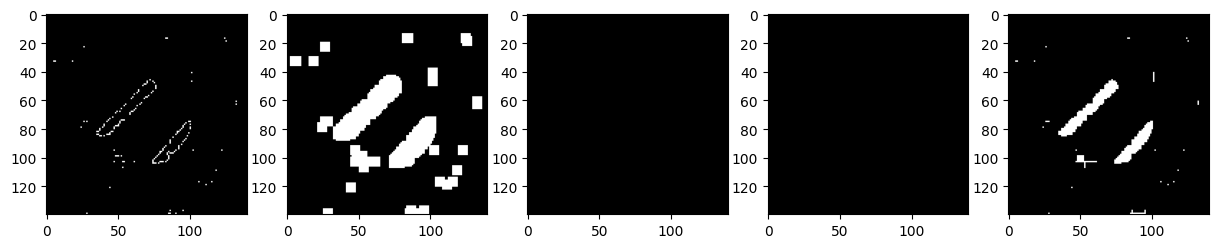

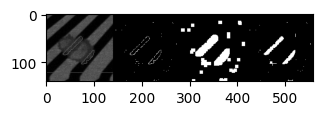

In [38]:
hsv_blue = cv2.imread('output/cropHSV_blue.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((7,7), np.uint8)
threshold = 102

# Try to use erosion, dilation, open, close to fill up the lines.

"""
Your code here
"""
_,image_binary_yellow = cv2.threshold(hsv_blue, threshold, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.imshow(image_binary_yellow , cmap='gray')

dilated_img = cv2.dilate(image_binary_yellow, kernel, iterations=1)
eroded_img = cv2.erode(image_binary_yellow, kernel, iterations=1)
open_img = cv2.erode(dilated_img, kernel, iterations=1)
close_img = cv2.dilate(eroded_img, kernel, iterations=1)


plt.subplot(1, 5, 2)
plt.imshow(dilated_img , cmap='gray')


plt.subplot(1, 5, 3)
plt.imshow(eroded_img , cmap='gray')

plt.subplot(1, 5, 4)
plt.imshow(close_img , cmap='gray')


plt.subplot(1, 5, 5)
plt.imshow(open_img , cmap='gray')

result = np.hstack((hsv_blue, image_binary_yellow, dilated_img, open_img))
plt.figure(figsize=(20, 20))
plt.subplot(1, 5, 1)
plt.imshow(result, cmap='gray')
# save result
cv2.imwrite('output/morpho_blue.jpg', result)

## **6. Find countours**

Use package to find the contours in the image.

Practice:
1. Find the pad and probemark contours in the pad series images.
2. Calculate the countours area.

輪廓 0 的面積是: 23.0
輪廓 1 的面積是: 25.0
輪廓 2 的面積是: 12.0
輪廓 3 的面積是: 4.0
輪廓 4 的面積是: 114.0
輪廓 5 的面積是: 1341.5
輪廓 0 的面積是: 54.0
輪廓 1 的面積是: 122.5
輪廓 2 的面積是: 12036.0
輪廓 3 的面積是: 26.0
輪廓 0 的面積是: 3498.0
輪廓 1 的面積是: 7737.0
輪廓 2 的面積是: 3496.5


True

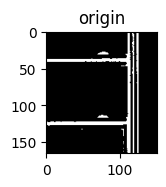

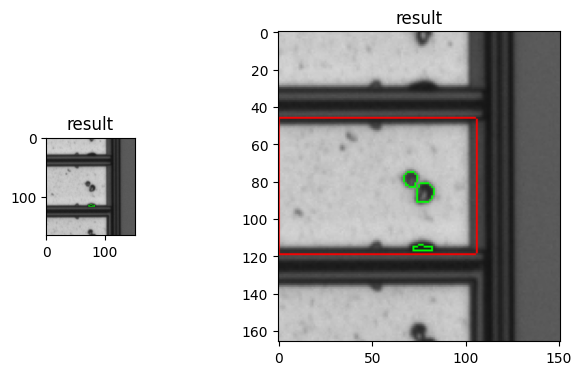

In [33]:
pad_task1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3,3), np.uint8)
kernel1 = np.ones((11,11), np.uint8)
threshold = 138
threshold1 = 216
#208
#黑白反轉
_,image_binary_pad3 = cv2.threshold(255-pad_task1, threshold1, 255, cv2.THRESH_BINARY)

#膨脹收縮
dilation_img3 = cv2.dilate(image_binary_pad3, kernel, iterations=1)
close_img3 = cv2.erode(dilation_img3, kernel, iterations=1)
dilation_img3 = cv2.dilate(close_img3, kernel, iterations=1)
close_img4 = cv2.erode(close_img3, kernel, iterations=1)
dilation_img4 = cv2.dilate(close_img4, kernel, iterations=1)
close_img5 = cv2.erode(dilation_img4, kernel, iterations=1)

#dilation_img4 = cv2.dilate(close_img4, kernel, iterations=1)
# 顯示處理後的圖像
plt.figure(figsize=(10, 10))
plt.subplot(1, 6, 1)
plt.title('origin')
plt.imshow(image_binary_pad3, cmap='gray')
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.title('origin')
plt.imshow(pad_task1, cmap='gray')
# 找到輪廓
contours, _ = cv2.findContours(dilation_img4, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
image_with_contours = cv2.cvtColor(pad_task1, cv2.COLOR_GRAY2BGR)

# 計算每個輪廓的面積並繪製
for i, contour in enumerate(contours):
    pad_area3 = cv2.contourArea(contour)
    print(f"輪廓 {i} 的面積是: {pad_area3}")
    if  21 < pad_area3 < 25:
        # 複製原始圖像以繪製輪廓

        cv2.drawContours(image_with_contours, contours, i, (0, 255, 0),1)
        plt.subplot(1, 6, 2)
        plt.title('result')
        plt.imshow(image_with_contours, cmap='gray')    


        
#黑白反轉
_,image_binary_pad = cv2.threshold(255-pad_task1, threshold, 255, cv2.THRESH_BINARY)

#膨脹收縮
dilation_img = cv2.erode(image_binary_pad, kernel, iterations=1)
close_img = cv2.dilate(dilation_img, kernel, iterations=1)

# 顯示處理後的圖像
#plt.figure(figsize=(40, 120))
#plt.subplot(1, 6, 3)
#plt.title('origin')
#plt.imshow(close_img, cmap='gray')

# 找到輪廓
contours, _ = cv2.findContours(close_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours2 = cv2.cvtColor(pad_task1, cv2.COLOR_GRAY2BGR)

# 計算每個輪廓的面積並繪製
for i, contour in enumerate(contours):
    pad_area = cv2.contourArea(contour)
    print(f"輪廓 {i} 的面積是: {pad_area}")
    if 100 < pad_area < 1000:
        # 複製原始圖像以繪製輪廓

        cv2.drawContours(image_with_contours, contours, i, (0, 255, 0),1)
        #plt.subplot(1, 6, 4)
        #plt.title('result')
        #plt.imshow(image_with_contours, cmap='gray')    
    

#黑白
_,image_binary_pad2 = cv2.threshold(pad_task1, threshold, 255, cv2.THRESH_BINARY)

#膨脹收縮
dilation1_img = cv2.erode(image_binary_pad2, kernel1, iterations=1)
dilation2_img = cv2.dilate(dilation1_img, kernel1, iterations=1)
dilation3_img = cv2.dilate(dilation2_img, kernel1, iterations=1)
close1_img = cv2.erode(dilation3_img, kernel1, iterations=1)
dilation4_img = cv2.erode(dilation3_img, kernel1, iterations=1)
dilation5_img = cv2.dilate(dilation4_img, kernel1, iterations=1)
dilation6_img = cv2.dilate(dilation5_img, kernel1, iterations=1)
close2_img = cv2.erode(dilation6_img, kernel1, iterations=1)
# 顯示處理後的圖像
#plt.subplot(1, 6, 5)
#plt.title('origin')
#plt.imshow(close2_img, cmap='gray')

# 找到輪廓
contours, _ = cv2.findContours(close2_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours1 = cv2.cvtColor(pad_task1 , cv2.COLOR_GRAY2BGR)
	
# 計算每個輪廓的面積並繪製
for i, contour in enumerate(contours):
    pad_area = cv2.contourArea(contour)
    print(f"輪廓 {i} 的面積是: {pad_area}")
    if 4000 < pad_area < 8000:
        # 複製原始圖像以繪製輪廓

        cv2.drawContours(image_with_contours, contours, i, (255, 0, 0),1)
        plt.subplot(1, 6, 6)
        plt.title('result')
        plt.imshow(image_with_contours, cmap='gray')    
        plt.subplot(1, 2, 2)
        plt.title('result')
        plt.imshow(image_with_contours, cmap='gray')    
# save and print result
result =image_with_contours
cv2.imwrite('output/pad_task1_cont.bmp', result)


